In [1]:
import pickle
import pandas as pd

In [17]:
with open('outputs/witb_16.pkl', 'rb') as f:
    data = pickle.load(f)  # might be pickle.load()

In [18]:
data.keys()

dict_keys(['n_total_docs', 'n_ok_docs', 'ngram', 'sonar', 'delimit', 'perplexity'])

In [114]:
for n in data['ngram']:
    print(n)

pornography
profanity
hate-speech


In [115]:
df = pd.DataFrame(columns=['Adult_Ngrams', 'Profanity_Ngrams', 'Hate_Ngrams', 'Hate_Sonar', 'Hate_Delimit','Perplexity'])

In [136]:
df['Adult_Ngrams']= data['ngram']['pornography']
df['Profanity_Ngrams']= data['ngram']['profanity']
df['Hate_Ngrams']= data['ngram']['hate-speech']
df['Hate_Sonar']= data['sonar'].astype(float)
df['Hate_Delimit']= data['delimit']
df['Perplexity']= data['perplexity']


In [143]:
df.head()

,Adult_Ngrams,Profanity_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Perplexity,Hate_Sonar_normalized,Hate_Delimit_normalized
0,0,0,0,1.0,1.0,307.7,0.000136,0.033333
1,0,0,0,4.0,4.0,1013.0,0.000544,0.133333
2,14,46,4,12.0,17.0,2754.1,0.001631,0.566667
3,0,0,0,22.0,22.0,1051.4,0.002990,0.733333
4,0,0,0,75.0,30.0,2966.7,0.010192,1.000000


In [153]:
df['Perplexity'].describe()

count    14538.00
mean         -inf
std           NaN
min          -inf
25%        499.20
50%        846.70
75%       1474.95
max      98496.90
Name: Perplexity, dtype: float64

In [137]:
#normalizing sonar values
x = df[['Hate_Sonar']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Sonar_normalized'] = pd.DataFrame(x_scaled)

In [141]:
df['Hate_Delimit'].describe()

count    14538.000000
mean        23.104966
std          9.209648
min          0.000000
25%         16.000000
50%         30.000000
75%         30.000000
max         30.000000
Name: Hate_Delimit, dtype: float64

In [142]:
#normalizing sonar values
x = df[['Hate_Delimit']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Delimit_normalized'] = pd.DataFrame(x_scaled)

In [130]:
df['Adult_Ngrams'][df.Adult_Ngrams > 1].count()

249

In [83]:
df['Profanity_Ngrams'][df.Profanity_Ngrams > 1].count()

8162

In [90]:
df['Hate_Ngrams'][df.Hate_Ngrams > 1].count()

1508

In [91]:
df['Hate_Sonar'][df.Hate_Sonar > 1].count()

14251

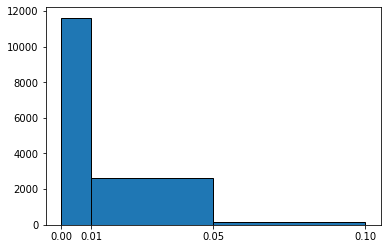

In [151]:
import matplotlib.pyplot as plt

bins= [0, 0.01, 0.05, 0.1]
plt.hist(df['Hate_Sonar_normalized'].values, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()


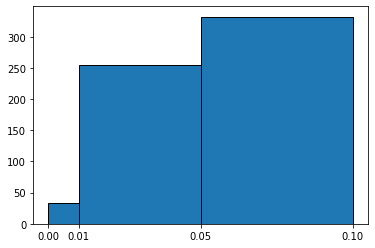

In [152]:
import matplotlib.pyplot as plt

bins= [0, 0.01, 0.05, 0.1]
plt.hist(df['Hate_Delimit_normalized'].values, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()


In [92]:
df['Hate_Delimit'][df.Hate_Delimit > 1].count()

14250

In [78]:
df['Profanity_Ngrams'].value_counts()

0       4584
1       1792
2       1326
3        987
4        787
        ... 
162        1
186        1
194        1
202        1
1619       1
Name: Profanity_Ngrams, Length: 231, dtype: int64